In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

sns.set()

In [94]:
def woe_ordered_continuous(df,var,target):
    df1 = pd.concat([df[var],target],axis=1)
    df2 = df1.groupby(var).agg({'good_bad':'mean'}).reset_index()
    df3 = pd.concat([df2,df1[var].value_counts().sort_index().reset_index().iloc[:,1]],axis=1)
    df3.columns = ['grade','good_prop','cnt']
    # Good / bad
    df3['good'] = df3['good_prop'] * df3.cnt
    df3['bad'] = (1-df3['good_prop']) * df3.cnt
    # As %
    df3['good_pct'] = df3.good / df3.good.sum()
    df3['bad_pct'] = df3.bad / df3.bad.sum()
    # Woe
    df3['woe'] = np.log(df3.good_pct / df3.bad_pct)
    # df3.sort_values('woe',inplace=True)
    # df3.reset_index(drop=True,inplace=True)
    # Differences
    df3['diff_good_prop'] = df3.good_prop.diff().abs()
    df3['diff_woe'] = df3.woe.diff().abs()
    # IV
    df3['iv'] = (df3.woe * (df3.good_pct - df3.bad_pct)).sum()
    return df3

In [95]:
def plot_by_woe(df,rotation=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df.loc[:,'woe']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.title('Weight of evidence by '+df.columns.values[0])
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WoE')
    plt.xticks(rotation=rotation)

### Data

In [96]:
df = pd.read_csv('../processed/x_test_03_output.csv')
target = pd.read_csv('../processed/y_test.csv')

In [97]:
df_temp = woe_ordered_continuous(df,'term_int',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,36,0.914636,67534,61769.0,5765.0,0.732051,0.649285,0.119979,NaN,NaN,0.032209
1,60,0.878941,25723,22609.0,3114.0,0.267949,0.350715,-0.269178,0.035695,0.389156,0.032209


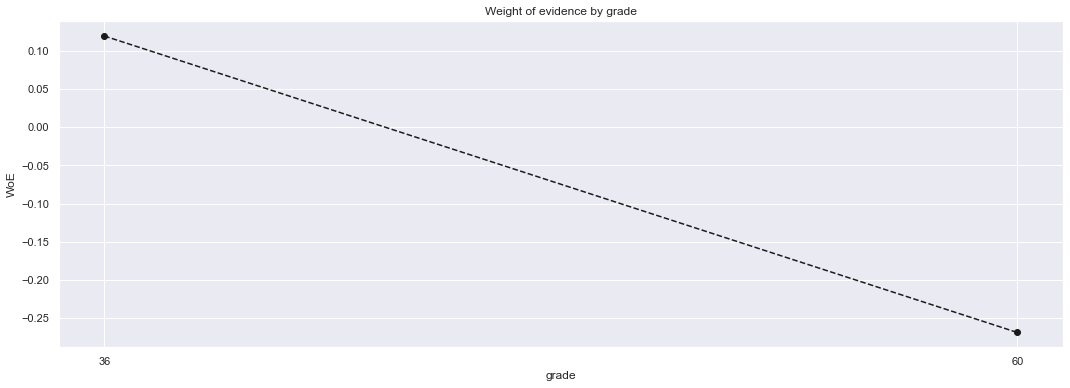

In [98]:
plot_by_woe(df_temp)

In [99]:
df['term_int_36'] = np.where(df.term_int == 36,1,0)
df['term_int_60'] = np.where(df.term_int == 60,1,0)

In [100]:
df_temp = woe_ordered_continuous(df,'emp_length_int',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0,0.891457,11553,10299.0,1254.0,0.122058,0.141232,-0.145909,NaN,NaN,0.007952
1,1,0.909182,5968,5426.0,542.0,0.064306,0.061043,0.052074,0.017726,0.197983,0.007952
2,2,0.901869,8295,7481.0,814.0,0.088661,0.091677,-0.033456,0.007314,0.085530,0.007952
3,3,0.902720,7391,6672.0,719.0,0.079073,0.080978,-0.023804,0.000851,0.009652,0.007952
4,4,0.905491,5555,5030.0,525.0,0.059613,0.059128,0.008159,0.002771,0.031963,0.007952
5,5,0.898736,6172,5547.0,625.0,0.065740,0.070391,-0.068357,0.006754,0.076516,0.007952
6,6,0.893971,5225,4671.0,554.0,0.055358,0.062394,-0.119654,0.004765,0.051297,0.007952
7,7,0.904307,5131,4640.0,491.0,0.054991,0.055299,-0.005592,0.010336,0.114062,0.007952
8,8,0.903347,4542,4103.0,439.0,0.048626,0.049443,-0.016643,0.000961,0.011051,0.007952
9,9,0.904170,3621,3274.0,347.0,0.038802,0.039081,-0.007175,0.000824,0.009469,0.007952


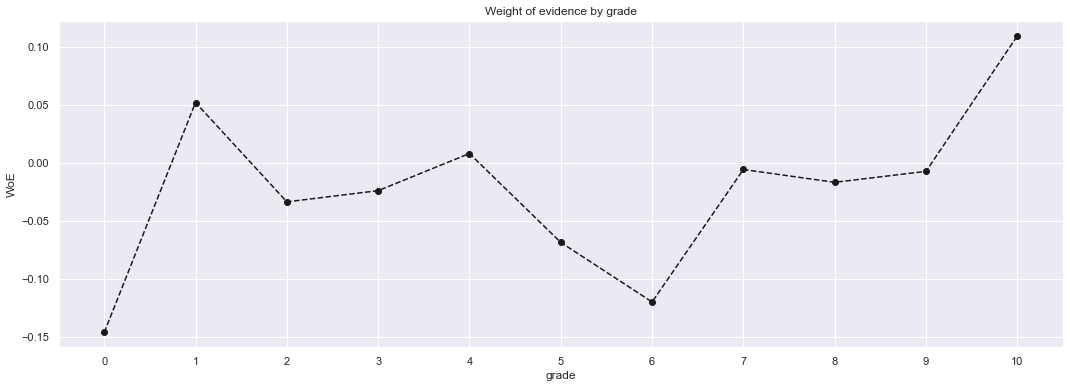

In [101]:
plot_by_woe(df_temp)

In [102]:
df['emp_length_int_0'] = np.where(df.emp_length_int == 0,1,0)
df['emp_length_int_1'] = np.where(df.emp_length_int == 1,1,0)
df['emp_length_int_2_4'] = np.where(np.isin(df.emp_length_int,[2,3,4]),1,0)
df['emp_length_int_5_6'] = np.where(np.isin(df.emp_length_int,[5,6]),1,0)
df['emp_length_int_7_9'] = np.where(np.isin(df.emp_length_int,[7,8,9]),1,0)
df['emp_length_int_10'] = np.where(df.emp_length_int == 10,1,0)

In [103]:
df.mths_since_issue_d.unique()

array([ 30,  27,  55,  26,  47,  39,  75,  40,  37,  48,  61,  66,  36,
        35,  45,  44, 108,  52,  91,  28,  42,  29,  41,  32,  38,  46,
        34,  25,  43,  63,  33,  62,  92,  59,  84,  78,  57,  71,  60,
        65,  93,  54,  69,  80,  64,  56,  31,  50,  53,  49,  74,  77,
        99,  85,  67,  72,  58,  79,  51,  97,  68,  81, 107,  88,  70,
       104,  86, 103, 105,  89,  82, 106,  95, 113,  90, 114,  76,  73,
        83,  94,  98,  87,  96, 101, 102, 111, 100, 109, 110, 112, 115])

In [104]:
df['mths_since_issue_d_factor'] = pd.cut(df.mths_since_issue_d,50)

In [105]:
df_temp = woe_ordered_continuous(df,'mths_since_issue_d_factor',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(24.91, 26.8]",0.960645,7191,6908.0,283.0,0.081870,0.031873,0.943371,NaN,NaN,inf
1,"(26.8, 28.6]",0.948113,9752,9246.0,506.0,0.109578,0.056988,0.653792,0.012532,0.289579,inf
2,"(28.6, 30.4]",0.935199,9506,8890.0,616.0,0.105359,0.069377,0.417818,0.012914,0.235974,inf
3,"(30.4, 32.2]",0.928591,7240,6723.0,517.0,0.079677,0.058227,0.313629,0.006608,0.104188,inf
4,"(32.2, 34.0]",0.919219,7217,6634.0,583.0,0.078622,0.065661,0.180158,0.009373,0.133471,inf
5,"(34.0, 35.8]",0.909472,3104,2823.0,281.0,0.033457,0.031648,0.055583,0.009747,0.124575,inf
6,"(35.8, 37.6]",0.907859,6197,5626.0,571.0,0.066676,0.064309,0.036147,0.001613,0.019436,inf
7,"(37.6, 39.4]",0.903625,5821,5260.0,561.0,0.062339,0.063183,-0.013452,0.004234,0.049599,inf
8,"(39.4, 41.2]",0.890460,5021,4471.0,550.0,0.052988,0.061944,-0.156169,0.013165,0.142716,inf
9,"(41.2, 43.0]",0.880142,4497,3958.0,539.0,0.046908,0.060705,-0.257839,0.010318,0.101671,inf


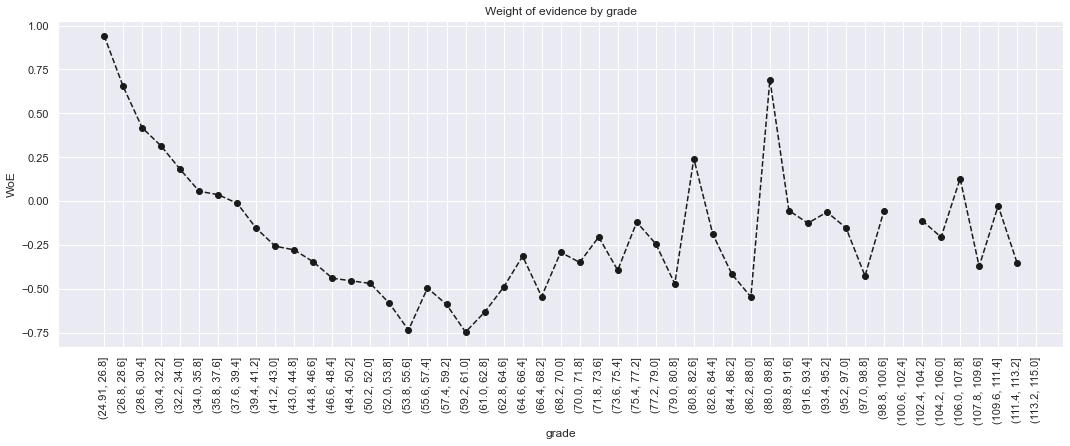

In [106]:
plot_by_woe(df_temp, rotation = 90)

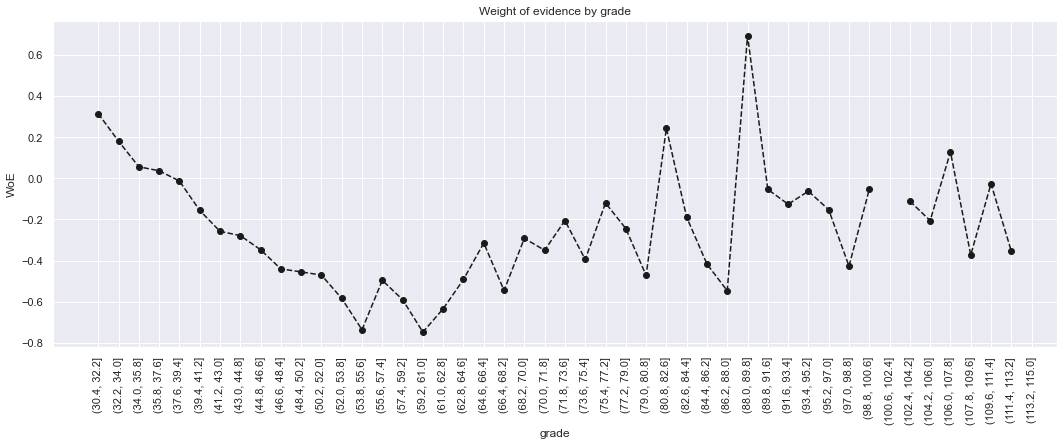

In [107]:
plot_by_woe(df_temp.iloc[3:],rotation=90)

In [108]:
df['mths_since_issue_d_27'] = np.where(df.mths_since_issue_d<=27,1,0)
df['mths_since_issue_d_27_29'] = np.where((df.mths_since_issue_d>27)&(df.mths_since_issue_d<=29),1,0)
df['mths_since_issue_d_29_30'] = np.where((df.mths_since_issue_d>29)&(df.mths_since_issue_d<=30),1,0)
df['mths_since_issue_d_30_39'] = np.where((df.mths_since_issue_d>30)&(df.mths_since_issue_d<=39),1,0)
df['mths_since_issue_d_39_45'] = np.where((df.mths_since_issue_d>39)&(df.mths_since_issue_d<=45),1,0)
df['mths_since_issue_d_45_56'] = np.where((df.mths_since_issue_d>45)&(df.mths_since_issue_d<=56),1,0)
df['mths_since_issue_d_56_84'] = np.where((df.mths_since_issue_d>56)&(df.mths_since_issue_d<=84),1,0)
df['mths_since_issue_d_84'] = np.where(df.mths_since_issue_d>84,1,0)


In [109]:
df['int_rate_factor'] = pd.cut(df.int_rate,50)

In [110]:
df_temp = woe_ordered_continuous(df,'int_rate_factor',target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(5.399, 5.833]",0.969697,198,192.0,6.0,0.002275,0.000676,1.214118,NaN,NaN,0.366847
1,"(5.833, 6.246]",0.980345,2086,2045.0,41.0,0.024236,0.004618,1.657963,0.010648,0.443845,0.366847
2,"(6.246, 6.658]",0.975177,1974,1925.0,49.0,0.022814,0.005519,1.419243,0.005168,0.238720,0.366847
3,"(6.658, 7.071]",0.949686,477,453.0,24.0,0.005369,0.002703,0.686221,0.025492,0.733023,0.366847
4,"(7.071, 7.484]",0.985075,804,792.0,12.0,0.009386,0.001352,1.938037,0.035389,1.251816,0.366847
5,"(7.484, 7.897]",0.968259,3245,3142.0,103.0,0.037237,0.011600,1.166268,0.016816,0.771769,0.366847
6,"(7.897, 8.31]",0.955537,2429,2321.0,108.0,0.027507,0.012164,0.816004,0.012722,0.350264,0.366847
7,"(8.31, 8.722]",0.971429,1680,1632.0,48.0,0.019342,0.005406,1.274743,0.015891,0.458738,0.366847
8,"(8.722, 9.135]",0.947987,2384,2260.0,124.0,0.026784,0.013966,0.651221,0.023442,0.623522,0.366847
9,"(9.135, 9.548]",0.983648,1590,1564.0,26.0,0.018536,0.002928,1.845288,0.035661,1.194067,0.366847


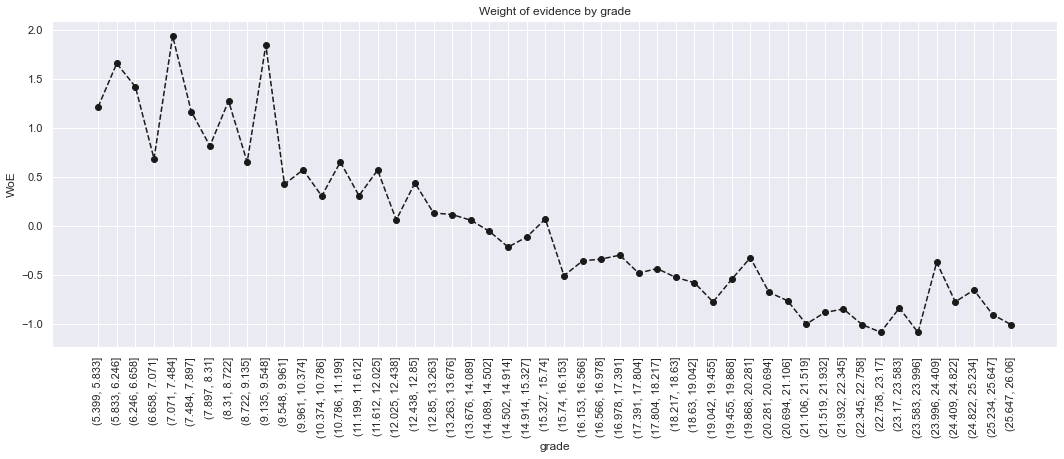

In [111]:
plot_by_woe(df_temp,rotation=90)

In [112]:
df['int_rate_9.548'] = np.where((df['int_rate'] <= 9.548), 1, 0)
df['int_rate_9.548-12.025'] = np.where((df['int_rate'] > 9.548) & (df['int_rate'] <= 12.025), 1, 0)
df['int_rate_12.025-15.74'] = np.where((df['int_rate'] > 12.025) & (df['int_rate'] <= 15.74), 1, 0)
df['int_rate_15.74-20.281'] = np.where((df['int_rate'] > 15.74) & (df['int_rate'] <= 20.281), 1, 0)
df['int_rate_>20.281'] = np.where((df['int_rate'] > 20.281), 1, 0)

In [113]:
df['funded_amnt_factor'] = pd.cut(df['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df, 'funded_amnt_factor', target)
# We calculate weight of evidence.
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(465.5, 1190.0]",0.896552,319,286.0,33.0,0.003390,0.003717,-0.092134,NaN,NaN,0.020342
1,"(1190.0, 1880.0]",0.898750,800,719.0,81.0,0.008521,0.009123,-0.068206,0.002198,0.023928,0.020342
2,"(1880.0, 2570.0]",0.912095,1513,1380.0,133.0,0.016355,0.014979,0.087872,0.013345,0.156077,0.020342
3,"(2570.0, 3260.0]",0.901486,1817,1638.0,179.0,0.019413,0.020160,-0.037772,0.010609,0.125644,0.020342
4,"(3260.0, 3950.0]",0.911647,1245,1135.0,110.0,0.013451,0.012389,0.082290,0.010161,0.120062,0.020342
5,"(3950.0, 4640.0]",0.896867,2298,2061.0,237.0,0.024426,0.026692,-0.088731,0.014780,0.171021,0.020342
6,"(4640.0, 5330.0]",0.910791,3957,3604.0,353.0,0.042713,0.039757,0.071714,0.013924,0.160445,0.020342
7,"(5330.0, 6020.0]",0.917821,4186,3842.0,344.0,0.045533,0.038743,0.161489,0.007030,0.089775,0.020342
8,"(6020.0, 6710.0]",0.893481,1718,1535.0,183.0,0.018192,0.020610,-0.124818,0.024341,0.286307,0.020342
9,"(6710.0, 7400.0]",0.910417,2880,2622.0,258.0,0.031074,0.029057,0.067115,0.016936,0.191934,0.020342


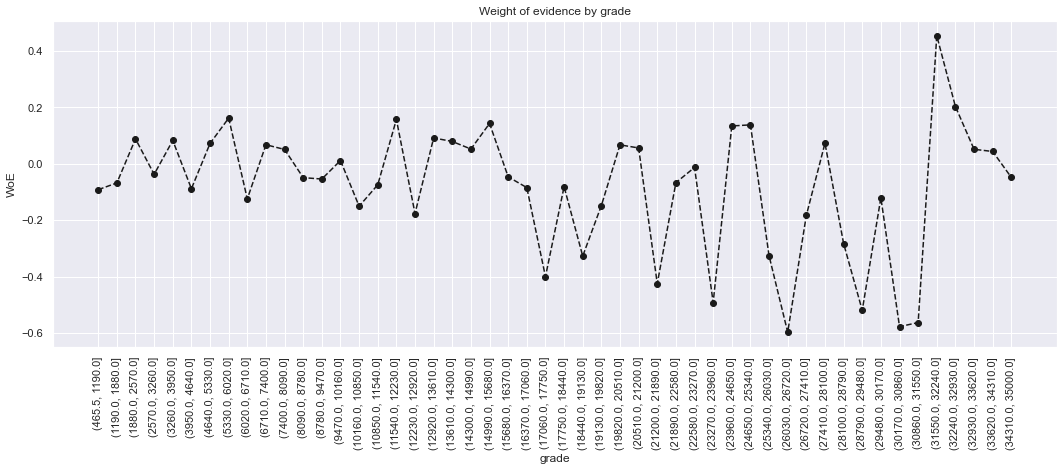

In [114]:
plot_by_woe(df_temp,90)

In [115]:
df_temp = woe_ordered_continuous(df, 'delinq_2yrs', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.904344,76566,69242.0,7324.0,0.820617,0.824868,-0.005167,NaN,NaN,inf
1,1.0,0.906612,11297,10242.0,1055.0,0.121382,0.118820,0.021338,0.002268,0.026505,inf
2,2.0,0.904135,3192,2886.0,306.0,0.034203,0.034463,-0.007576,0.002477,0.028915,inf
3,3.0,0.914462,1134,1037.0,97.0,0.012290,0.010925,0.117758,0.010327,0.125335,inf
4,4.0,0.907843,510,463.0,47.0,0.005487,0.005293,0.035962,0.006619,0.081797,inf
5,5.0,0.922222,270,249.0,21.0,0.002951,0.002365,0.221313,0.014379,0.185351,inf
6,6.0,0.882812,128,113.0,15.0,0.001339,0.001689,-0.232280,0.039410,0.453593,inf
7,7.0,0.910448,67,61.0,6.0,0.000723,0.000676,0.067497,0.027635,0.299777,inf
8,8.0,0.896552,29,26.0,3.0,0.000308,0.000338,-0.092134,0.013896,0.159630,inf
9,9.0,0.954545,22,21.0,1.0,0.000249,0.000113,0.792905,0.057994,0.885038,inf


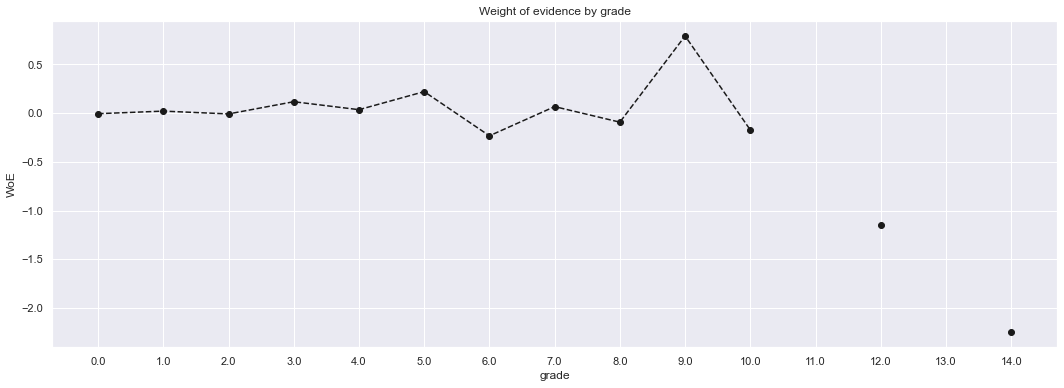

In [116]:
plot_by_woe(df_temp)

In [117]:
df['delinq_2yrs:0'] = np.where((df['delinq_2yrs'] == 0), 1, 0)
df['delinq_2yrs:1-3'] = np.where((df['delinq_2yrs'] >= 1) & (df['delinq_2yrs'] <= 3), 1, 0)
df['delinq_2yrs:>=4'] = np.where((df['delinq_2yrs'] >= 9), 1, 0)

In [118]:
df_temp = woe_ordered_continuous(df, 'inq_last_6mths', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.921793,48295,44518.0,3777.0,0.527602,0.425386,0.215346,NaN,NaN,inf
1,1.0,0.896979,25985,23308.0,2677.0,0.276233,0.301498,-0.087518,0.024814,0.302864,inf
2,2.0,0.875894,11611,10170.0,1441.0,0.120529,0.162293,-0.297513,0.021085,0.209995,inf
3,3.0,0.857648,5086,4362.0,724.0,0.051696,0.081541,-0.455723,0.018245,0.158210,inf
4,4.0,0.884696,1431,1266.0,165.0,0.015004,0.018583,-0.213946,0.027048,0.241778,inf
5,5.0,0.891107,551,491.0,60.0,0.005819,0.006758,-0.149518,0.006411,0.064427,inf
6,6.0,0.857820,211,181.0,30.0,0.002145,0.003379,-0.454318,0.033287,0.304800,inf
7,7.0,0.888889,36,32.0,4.0,0.000379,0.000451,-0.172176,0.031069,0.282142,inf
8,8.0,0.952381,21,20.0,1.0,0.000237,0.000113,0.744115,0.063492,0.916291,inf
9,9.0,1.000000,7,7.0,0.0,0.000083,0.000000,inf,0.047619,inf,inf


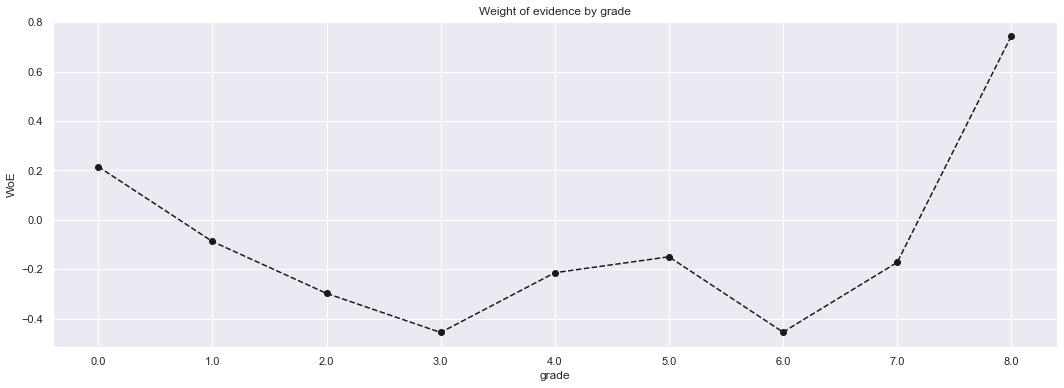

In [119]:
plot_by_woe(df_temp)

In [120]:
df['inq_last_6mths:0'] = np.where((df['inq_last_6mths'] == 0), 1, 0)
df['inq_last_6mths:1-2'] = np.where((df['inq_last_6mths'] >= 1) & (df['inq_last_6mths'] <= 2), 1, 0)
df['inq_last_6mths:3-6'] = np.where((df['inq_last_6mths'] >= 3) & (df['inq_last_6mths'] <= 6), 1, 0)
df['inq_last_6mths:>6'] = np.where((df['inq_last_6mths'] > 6), 1, 0)

In [121]:
df_temp = woe_ordered_continuous(df, 'open_acc', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,1.000000,7,7.0,0.0,0.000083,0.000000,inf,NaN,NaN,inf
1,1.0,1.000000,32,32.0,0.0,0.000379,0.000000,inf,0.000000,NaN,inf
2,2.0,0.847305,334,283.0,51.0,0.003354,0.005744,-0.537997,0.152695,inf,inf
3,3.0,0.868984,1122,975.0,147.0,0.011555,0.016556,-0.359613,0.021679,0.178384,inf
4,4.0,0.903516,2560,2313.0,247.0,0.027412,0.027818,-0.014705,0.034532,0.344907,inf
5,5.0,0.903929,4403,3980.0,423.0,0.047169,0.047641,-0.009953,0.000414,0.004753,inf
6,6.0,0.903314,6216,5615.0,601.0,0.066546,0.067688,-0.017016,0.000615,0.007063,inf
7,7.0,0.900444,7433,6693.0,740.0,0.079322,0.083343,-0.049450,0.002870,0.032435,inf
8,8.0,0.907385,8314,7544.0,770.0,0.089407,0.086721,0.030500,0.006941,0.079950,inf
9,9.0,0.902943,8768,7917.0,851.0,0.093828,0.095844,-0.021262,0.004443,0.051762,inf


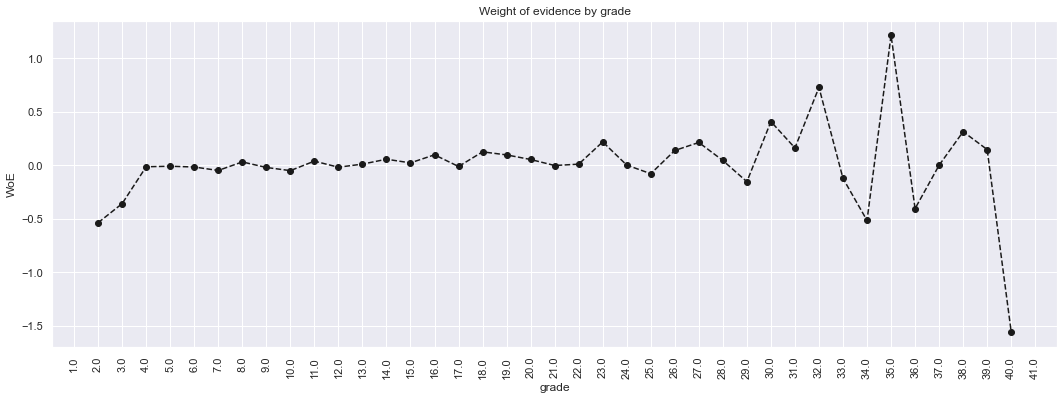

In [122]:
plot_by_woe(df_temp, 90)

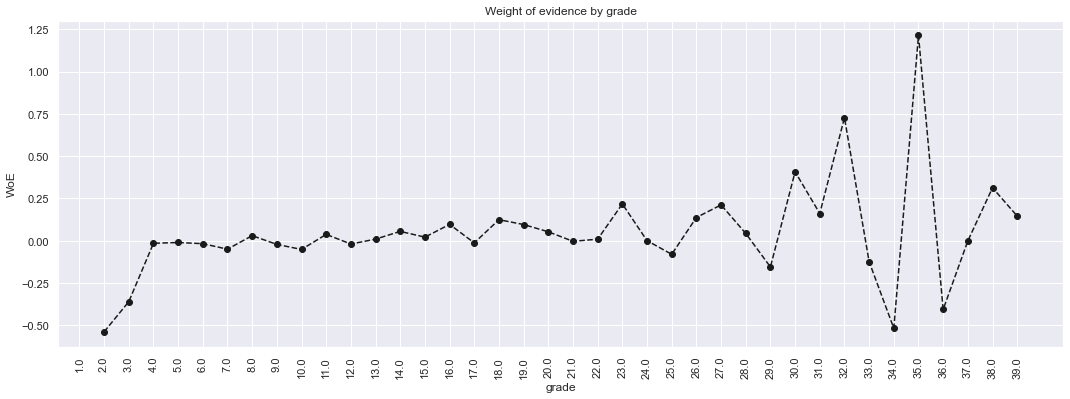

In [123]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [124]:
df['open_acc:0'] = np.where((df['open_acc'] == 0), 1, 0)
df['open_acc:1-3'] = np.where((df['open_acc'] >= 1) & (df['open_acc'] <= 3), 1, 0)
df['open_acc:4-12'] = np.where((df['open_acc'] >= 4) & (df['open_acc'] <= 12), 1, 0)
df['open_acc:13-17'] = np.where((df['open_acc'] >= 13) & (df['open_acc'] <= 17), 1, 0)
df['open_acc:18-22'] = np.where((df['open_acc'] >= 18) & (df['open_acc'] <= 22), 1, 0)
df['open_acc:23-25'] = np.where((df['open_acc'] >= 23) & (df['open_acc'] <= 25), 1, 0)
df['open_acc:26-30'] = np.where((df['open_acc'] >= 26) & (df['open_acc'] <= 30), 1, 0)
df['open_acc:>=31'] = np.where((df['open_acc'] >= 31), 1, 0)

In [125]:
df_temp = woe_ordered_continuous(df, 'pub_rec', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.903044,80923,73077.0,7846.0,0.866067,0.883658,-0.020108,NaN,NaN,inf
1,1.0,0.916401,10670,9778.0,892.0,0.115883,0.100462,0.142806,0.013357,0.162914,inf
2,2.0,0.917046,1097,1006.0,91.0,0.011923,0.010249,0.151260,0.000645,0.008454,inf
3,3.0,0.924471,331,306.0,25.0,0.003627,0.002816,0.253092,0.007425,0.101831,inf
4,4.0,0.857143,112,96.0,16.0,0.001138,0.001802,-0.459858,0.067328,0.712950,inf
5,5.0,0.917808,73,67.0,6.0,0.000794,0.000676,0.161315,0.060665,0.621174,inf
6,6.0,1.000000,19,19.0,0.0,0.000225,0.000000,inf,0.082192,inf,inf
7,7.0,0.785714,14,11.0,3.0,0.000130,0.000338,-0.952335,0.214286,inf,inf
8,8.0,1.000000,5,5.0,0.0,0.000059,0.000000,inf,0.214286,inf,inf
9,9.0,1.000000,2,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


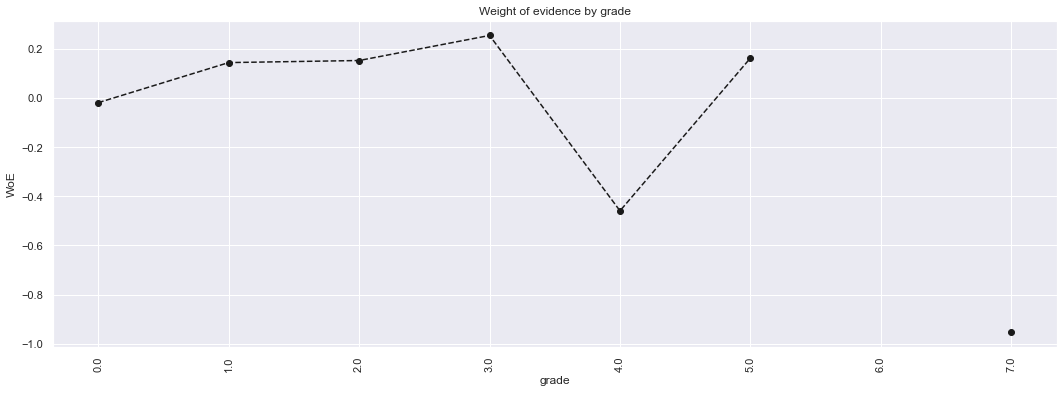

In [126]:
plot_by_woe(df_temp, 90)

In [127]:
df['pub_rec:0-2'] = np.where((df['pub_rec'] >= 0) & (df['pub_rec'] <= 2), 1, 0)
df['pub_rec:3-4'] = np.where((df['pub_rec'] >= 3) & (df['pub_rec'] <= 4), 1, 0)
df['pub_rec:>=5'] = np.where((df['pub_rec'] >= 5), 1, 0)

In [128]:
df['total_acc_factor'] = pd.cut(df['total_acc'], 50)
df_temp = woe_ordered_continuous(df, 'total_acc_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.156, 3.12]",0.824000,125,103.0,22.0,0.001221,0.002478,-0.707931,NaN,NaN,inf
1,"(3.12, 6.24]",0.875250,1499,1312.0,187.0,0.015549,0.021061,-0.303418,0.051250,0.404513,inf
2,"(6.24, 9.36]",0.886676,3715,3294.0,421.0,0.039039,0.047415,-0.194393,0.011425,0.109026,inf
3,"(9.36, 12.48]",0.891539,6288,5606.0,682.0,0.066439,0.076810,-0.145055,0.004864,0.049338,inf
4,"(12.48, 15.6]",0.902280,8289,7479.0,810.0,0.088637,0.091226,-0.028798,0.010741,0.116257,inf
5,"(15.6, 18.72]",0.902672,9843,8885.0,958.0,0.105300,0.107895,-0.024346,0.000392,0.004452,inf
6,"(18.72, 21.84]",0.905940,10270,9304.0,966.0,0.110266,0.108796,0.013418,0.003268,0.037764,inf
7,"(21.84, 24.96]",0.907532,9971,9049.0,922.0,0.107244,0.103841,0.032247,0.001592,0.018828,inf
8,"(24.96, 28.08]",0.906679,11873,10765.0,1108.0,0.127581,0.124789,0.022126,0.000853,0.010121,inf
9,"(28.08, 31.2]",0.905337,7289,6599.0,690.0,0.078208,0.077711,0.006364,0.001342,0.015762,inf


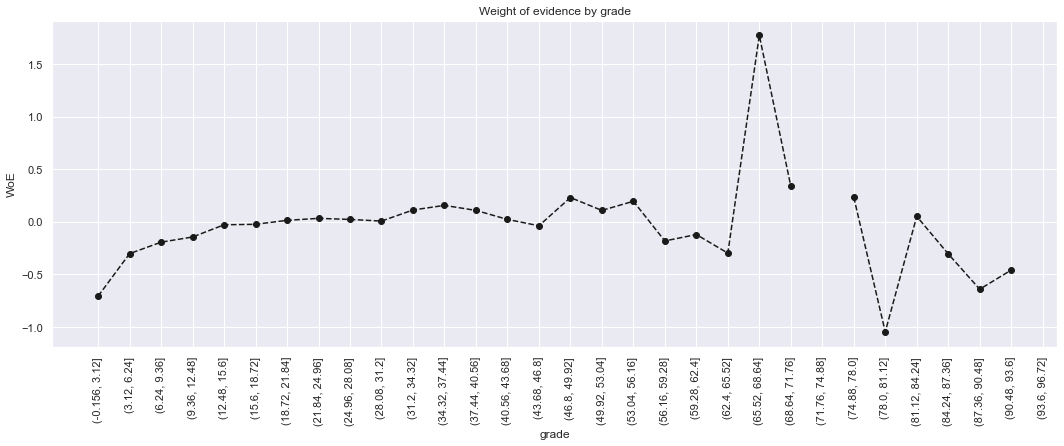

In [129]:
plot_by_woe(df_temp, 90)

In [130]:
df['total_acc:<=27'] = np.where((df['total_acc'] <= 27), 1, 0)
df['total_acc:28-51'] = np.where((df['total_acc'] >= 28) & (df['total_acc'] <= 51), 1, 0)
df['total_acc:>=52'] = np.where((df['total_acc'] >= 52), 1, 0)

In [131]:
df_temp = woe_ordered_continuous(df, 'acc_now_delinq', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,0.0,0.904750,92871,84025.0,8846.0,0.995816,0.996283,-0.000469,NaN,NaN,0.000168
1,1.0,0.916667,360,330.0,30.0,0.003911,0.003379,0.146278,0.011917,0.146746,0.000168
2,2.0,0.909091,22,20.0,2.0,0.000237,0.000225,0.050967,0.007576,0.095310,0.000168
3,3.0,0.750000,4,3.0,1.0,0.000036,0.000113,-1.153005,0.159091,1.203973,0.000168


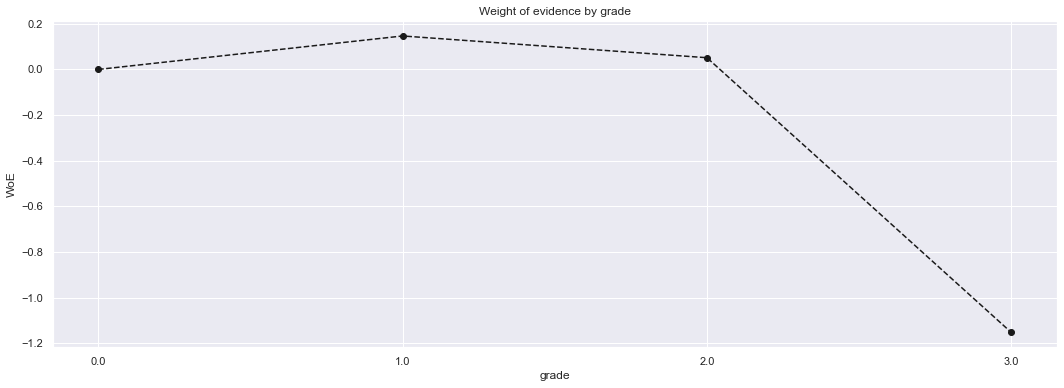

In [132]:
plot_by_woe(df_temp)

In [133]:
df['acc_now_delinq:0'] = np.where((df['acc_now_delinq'] == 0), 1, 0)
df['acc_now_delinq:>=1'] = np.where((df['acc_now_delinq'] >= 1), 1, 0)

In [134]:
df['total_rev_hi_lim_factor'] = pd.cut(df['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df, 'total_rev_hi_lim_factor', target)
df_temp

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-2013.133, 1006.566]",0.852941,238,203.0,35.0,0.002406,0.003942,-0.493760,NaN,NaN,inf
1,"(1006.566, 2013.133]",0.839233,678,569.0,109.0,0.006743,0.012276,-0.599085,0.013708,0.105325,inf
2,"(2013.133, 3019.7]",0.863515,1121,968.0,153.0,0.011472,0.017232,-0.406824,0.024282,0.192262,inf
3,"(3019.7, 4026.266]",0.894593,1461,1307.0,154.0,0.015490,0.017344,-0.113081,0.031078,0.293743,inf
4,"(4026.266, 5032.832]",0.893204,2163,1932.0,231.0,0.022897,0.026016,-0.127724,0.001389,0.014644,inf
...,...,...,...,...,...,...,...,...,...,...,...
1995,"(2008100.168, 2009106.734]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(2009106.734, 2010113.301]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(2010113.301, 2011119.867]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(2011119.867, 2012126.434]",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


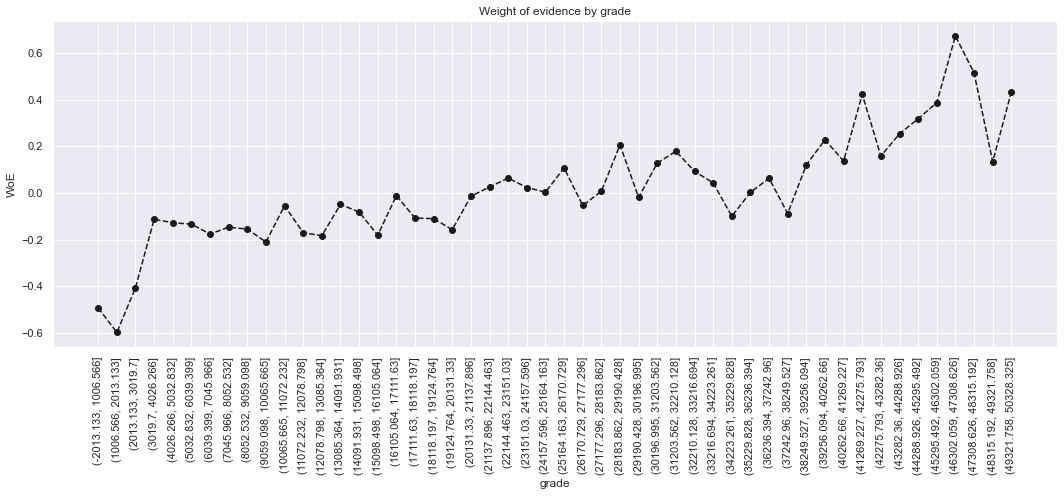

In [135]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [136]:
df['total_rev_hi_lim:<=5K'] = np.where((df['total_rev_hi_lim'] <= 5000), 1, 0)
df['total_rev_hi_lim:5K-10K'] = np.where((df['total_rev_hi_lim'] > 5000) & (df['total_rev_hi_lim'] <= 10000), 1, 0)
df['total_rev_hi_lim:10K-20K'] = np.where((df['total_rev_hi_lim'] > 10000) & (df['total_rev_hi_lim'] <= 20000), 1, 0)
df['total_rev_hi_lim:20K-30K'] = np.where((df['total_rev_hi_lim'] > 20000) & (df['total_rev_hi_lim'] <= 30000), 1, 0)
df['total_rev_hi_lim:30K-40K'] = np.where((df['total_rev_hi_lim'] > 30000) & (df['total_rev_hi_lim'] <= 40000), 1, 0)
df['total_rev_hi_lim:40K-55K'] = np.where((df['total_rev_hi_lim'] > 40000) & (df['total_rev_hi_lim'] <= 55000), 1, 0)
df['total_rev_hi_lim:55K-95K'] = np.where((df['total_rev_hi_lim'] > 55000) & (df['total_rev_hi_lim'] <= 95000), 1, 0)
df['total_rev_hi_lim:>95K'] = np.where((df['total_rev_hi_lim'] > 95000), 1, 0)

In [137]:
df['installment_factor'] = pd.cut(df['installment'], 50)
df_temp = woe_ordered_continuous(df, 'installment_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(14.369, 43.585]",0.882474,485,428.0,57.0,0.005072,0.006420,-0.235546,NaN,NaN,inf
1,"(43.585, 71.41]",0.910112,1246,1134.0,112.0,0.013440,0.012614,0.063390,0.027638,0.298936,inf
2,"(71.41, 99.235]",0.906412,1731,1569.0,162.0,0.018595,0.018245,0.018980,0.003700,0.044410,inf
3,"(99.235, 127.06]",0.910995,2292,2088.0,204.0,0.024746,0.022976,0.074224,0.004582,0.055245,inf
4,"(127.06, 154.885]",0.900077,2602,2342.0,260.0,0.027756,0.029283,-0.053539,0.010918,0.127763,inf
5,"(154.885, 182.71]",0.910719,4133,3764.0,369.0,0.044609,0.041559,0.070823,0.010642,0.124362,inf
6,"(182.71, 210.535]",0.915308,4109,3761.0,348.0,0.044573,0.039194,0.128620,0.004589,0.057797,inf
7,"(210.535, 238.36]",0.911260,3730,3399.0,331.0,0.040283,0.037279,0.077500,0.004048,0.051120,inf
8,"(238.36, 266.185]",0.917382,4660,4275.0,385.0,0.050665,0.043361,0.155678,0.006122,0.078178,inf
9,"(266.185, 294.01]",0.904925,4975,4502.0,473.0,0.053355,0.053272,0.001564,0.012457,0.154114,inf


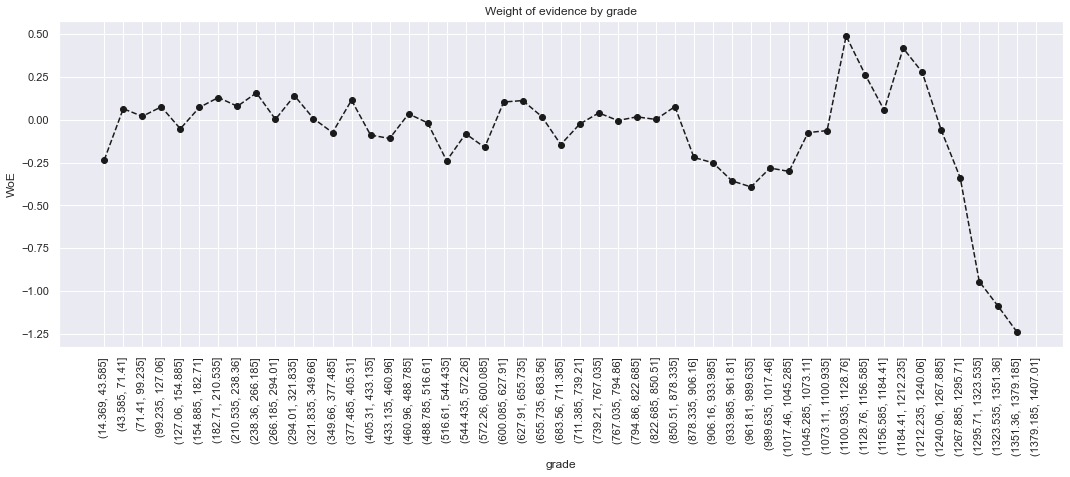

In [138]:
plot_by_woe(df_temp, 90)

In [139]:
df['annual_inc_factor'] = pd.cut(df['annual_inc'], 50)
df_temp = woe_ordered_continuous(df, 'annual_inc_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-2695.2, 154704.0]",0.903142,89203,80563.0,8640.0,0.954787,0.973083,-0.018981,NaN,NaN,inf
1,"(154704.0, 304608.0]",0.940154,3626,3409.0,217.0,0.040402,0.024440,0.502659,0.037012,0.521640,inf
2,"(304608.0, 454512.0]",0.936170,282,264.0,18.0,0.003129,0.002027,0.433960,0.003984,0.068700,inf
3,"(454512.0, 604416.0]",0.965116,86,83.0,3.0,0.000984,0.000338,1.068611,0.028946,0.634651,inf
4,"(604416.0, 754320.0]",1.000000,23,23.0,0.0,0.000273,0.000000,inf,0.034884,inf,inf
5,"(754320.0, 904224.0]",0.944444,18,17.0,1.0,0.000201,0.000113,0.581596,0.055556,inf,inf
6,"(904224.0, 1054128.0]",1.000000,7,7.0,0.0,0.000083,0.000000,inf,0.055556,inf,inf
7,"(1054128.0, 1204032.0]",1.000000,6,6.0,0.0,0.000071,0.000000,inf,0.000000,NaN,inf
8,"(1204032.0, 1353936.0]",1.000000,2,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
9,"(1353936.0, 1503840.0]",1.000000,2,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


In [140]:
df_temp = df.loc[df['annual_inc'] <= 140000, : ]

In [141]:
df_temp.index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            93246, 93247, 93248, 93249, 93250, 93251, 93252, 93253, 93255,
            93256],
           dtype='int64', length=87691)

In [142]:
df_temp['annual_inc_factor'] = pd.cut(df_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_temp, 'annual_inc_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_50904/3778394519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['annual_inc_factor'] = pd.cut(df_temp['annual_inc'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(4664.8, 7504.0]",1.000000,10,10.0,0.0,0.000126,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",0.785714,84,66.0,18.0,0.000834,0.002106,-0.926276,0.214286,inf,inf
2,"(10208.0, 12912.0]",0.821138,123,101.0,22.0,0.001276,0.002574,-0.701481,0.035424,0.224795,inf
3,"(12912.0, 15616.0]",0.878289,304,267.0,37.0,0.003374,0.004328,-0.249228,0.057151,0.452253,inf
4,"(15616.0, 18320.0]",0.835509,383,320.0,63.0,0.004043,0.007370,-0.600373,0.042780,0.351144,inf
5,"(18320.0, 21024.0]",0.863574,733,633.0,100.0,0.007998,0.011699,-0.380259,0.028065,0.220114,inf
6,"(21024.0, 23728.0]",0.870739,704,613.0,91.0,0.007745,0.010646,-0.318054,0.007164,0.062205,inf
7,"(23728.0, 26432.0]",0.874510,1785,1561.0,224.0,0.019724,0.026205,-0.284123,0.003771,0.033930,inf
8,"(26432.0, 29136.0]",0.867159,1355,1175.0,180.0,0.014847,0.021058,-0.349492,0.007351,0.065369,inf
9,"(29136.0, 31840.0]",0.868674,2292,1991.0,301.0,0.025157,0.035213,-0.336277,0.001515,0.013215,inf


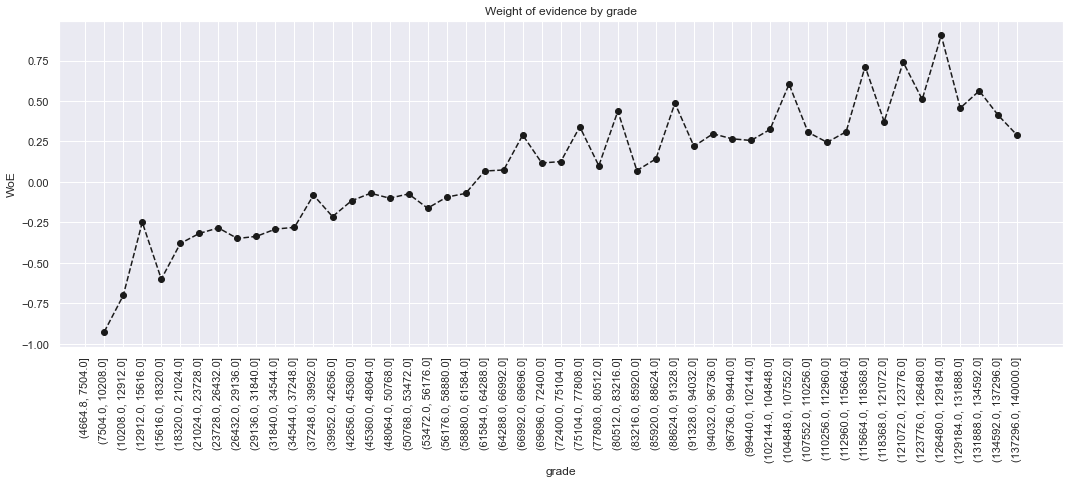

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
df['annual_inc:<20K'] = np.where((df['annual_inc'] <= 20000), 1, 0)
df['annual_inc:20K-30K'] = np.where((df['annual_inc'] > 20000) & (df['annual_inc'] <= 30000), 1, 0)
df['annual_inc:30K-40K'] = np.where((df['annual_inc'] > 30000) & (df['annual_inc'] <= 40000), 1, 0)
df['annual_inc:40K-50K'] = np.where((df['annual_inc'] > 40000) & (df['annual_inc'] <= 50000), 1, 0)
df['annual_inc:50K-60K'] = np.where((df['annual_inc'] > 50000) & (df['annual_inc'] <= 60000), 1, 0)
df['annual_inc:60K-70K'] = np.where((df['annual_inc'] > 60000) & (df['annual_inc'] <= 70000), 1, 0)
df['annual_inc:70K-80K'] = np.where((df['annual_inc'] > 70000) & (df['annual_inc'] <= 80000), 1, 0)
df['annual_inc:80K-90K'] = np.where((df['annual_inc'] > 80000) & (df['annual_inc'] <= 90000), 1, 0)
df['annual_inc:90K-100K'] = np.where((df['annual_inc'] > 90000) & (df['annual_inc'] <= 100000), 1, 0)
df['annual_inc:100K-120K'] = np.where((df['annual_inc'] > 100000) & (df['annual_inc'] <= 120000), 1, 0)
df['annual_inc:120K-140K'] = np.where((df['annual_inc'] > 120000) & (df['annual_inc'] <= 140000), 1, 0)
df['annual_inc:>140K'] = np.where((df['annual_inc'] > 140000), 1, 0)

In [145]:
df_temp = df[pd.notnull(df['mths_since_last_delinq'])]
df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_temp, 'mths_since_last_delinq_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_50904/1936663753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_delinq_factor'] = pd.cut(df_temp['mths_since_last_delinq'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.17, 3.4]",0.909496,1348,1226.0,122.0,0.031388,0.030258,0.036680,NaN,NaN,inf
1,"(3.4, 6.8]",0.900529,1890,1702.0,188.0,0.043575,0.046627,-0.067693,0.008966,0.104374,inf
2,"(6.8, 10.2]",0.903943,3373,3049.0,324.0,0.078061,0.080357,-0.028985,0.003414,0.038708,inf
3,"(10.2, 13.6]",0.910657,2496,2273.0,223.0,0.058194,0.055308,0.050873,0.006714,0.079859,inf
4,"(13.6, 17.0]",0.905213,3165,2865.0,300.0,0.073351,0.074405,-0.014270,0.005444,0.065143,inf
5,"(17.0, 20.4]",0.906223,2282,2068.0,214.0,0.052946,0.053075,-0.002450,0.001009,0.011820,inf
6,"(20.4, 23.8]",0.910165,2115,1925.0,190.0,0.049284,0.047123,0.044846,0.003943,0.047296,inf
7,"(23.8, 27.2]",0.906715,2755,2498.0,257.0,0.063955,0.063740,0.003359,0.003450,0.041488,inf
8,"(27.2, 30.6]",0.907206,1929,1750.0,179.0,0.044804,0.044395,0.009174,0.000491,0.005816,inf
9,"(30.6, 34.0]",0.908276,2453,2228.0,225.0,0.057042,0.055804,0.021948,0.001070,0.012774,inf


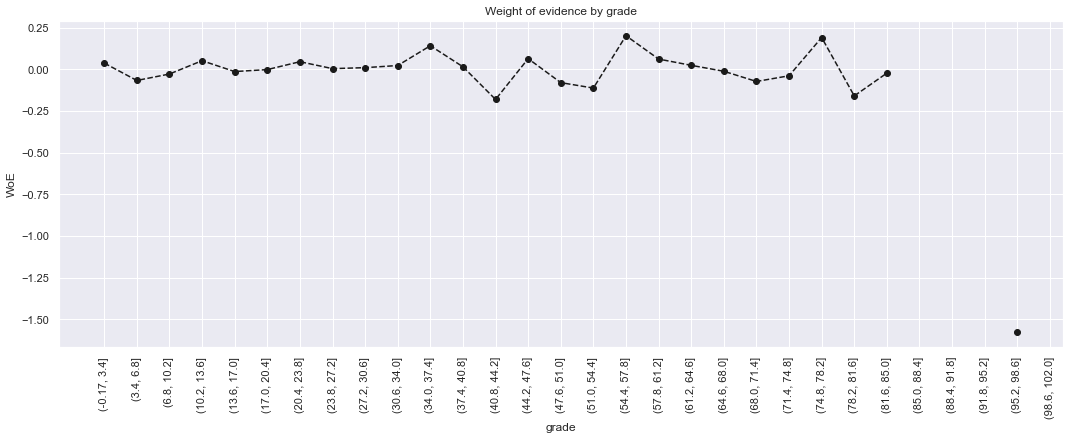

In [146]:
plot_by_woe(df_temp, 90)

In [147]:
df['mths_since_last_delinq:Missing'] = np.where((df['mths_since_last_delinq'].isnull()), 1, 0)
df['mths_since_last_delinq:0-3'] = np.where((df['mths_since_last_delinq'] >= 0) & (df['mths_since_last_delinq'] <= 3), 1, 0)
df['mths_since_last_delinq:4-30'] = np.where((df['mths_since_last_delinq'] >= 4) & (df['mths_since_last_delinq'] <= 30), 1, 0)
df['mths_since_last_delinq:31-56'] = np.where((df['mths_since_last_delinq'] >= 31) & (df['mths_since_last_delinq'] <= 56), 1, 0)
df['mths_since_last_delinq:>=57'] = np.where((df['mths_since_last_delinq'] >= 57), 1, 0)

In [148]:
df['dti_factor'] = pd.cut(df['dti'], 100)
df_temp = woe_ordered_continuous(df, 'dti_factor', target)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.04, 0.4]",0.930481,187,174.0,13.0,0.002062,0.001464,0.342488,NaN,NaN,0.038893
1,"(0.4, 0.8]",0.891304,184,164.0,20.0,0.001944,0.002253,-0.147484,0.039177,0.489972,0.038893
2,"(0.8, 1.2]",0.905830,223,202.0,21.0,0.002394,0.002365,0.012127,0.014525,0.159611,0.038893
3,"(1.2, 1.6]",0.921569,255,235.0,20.0,0.002785,0.002253,0.212235,0.015739,0.200108,0.038893
4,"(1.6, 2.0]",0.911111,315,287.0,28.0,0.003401,0.003154,0.075660,0.010458,0.136576,0.038893
...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",0.907407,54,49.0,5.0,0.000581,0.000563,0.030765,0.018519,0.202941,0.038893
96,"(38.39, 38.79]",0.837838,37,31.0,6.0,0.000367,0.000676,-0.609390,0.069570,0.640155,0.038893
97,"(38.79, 39.19]",0.844444,45,38.0,7.0,0.000450,0.000788,-0.559942,0.006607,0.049448,0.038893
98,"(39.19, 39.59]",0.909091,44,40.0,4.0,0.000474,0.000451,0.050967,0.064646,0.610909,0.038893


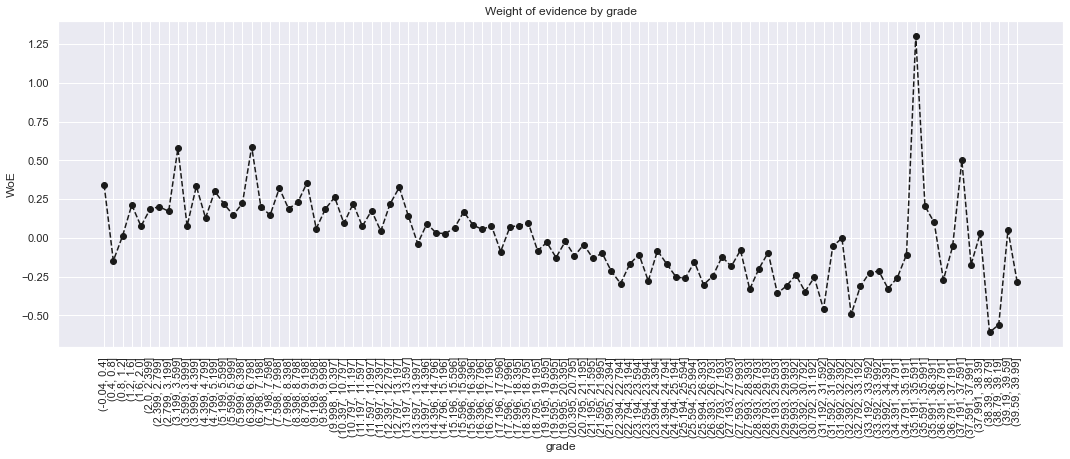

In [149]:
plot_by_woe(df_temp, 90)

In [150]:
df_temp = df.loc[df['dti'] <= 35, : ]

In [151]:
df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_temp, 'dti_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_50904/1444387856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['dti_factor'] = pd.cut(df_temp['dti'], 50)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.035, 0.7]",0.908537,328,298.0,30.0,0.003559,0.003404,0.044342,NaN,NaN,0.033427
1,"(0.7, 1.4]",0.923664,393,363.0,30.0,0.004335,0.003404,0.241651,0.015128,0.197309,0.033427
2,"(1.4, 2.1]",0.906716,536,486.0,50.0,0.005804,0.005674,0.022631,0.016948,0.219020,0.033427
3,"(2.1, 2.8]",0.920923,607,559.0,48.0,0.006676,0.005447,0.203394,0.014206,0.180763,0.033427
4,"(2.8, 3.5]",0.937115,811,760.0,51.0,0.009076,0.005788,0.449938,0.016192,0.246544,0.033427
5,"(3.5, 4.2]",0.913402,970,886.0,84.0,0.010581,0.009532,0.104346,0.023713,0.345593,0.033427
6,"(4.2, 4.9]",0.921053,1140,1050.0,90.0,0.012539,0.010213,0.205181,0.007651,0.100836,0.033427
7,"(4.9, 5.6]",0.923358,1370,1265.0,105.0,0.015107,0.011916,0.237312,0.002305,0.032131,0.033427
8,"(5.6, 6.3]",0.920188,1491,1372.0,119.0,0.016385,0.013504,0.193347,0.003170,0.043966,0.033427
9,"(6.3, 7.0]",0.935540,1722,1611.0,111.0,0.019239,0.012596,0.423526,0.015352,0.230179,0.033427


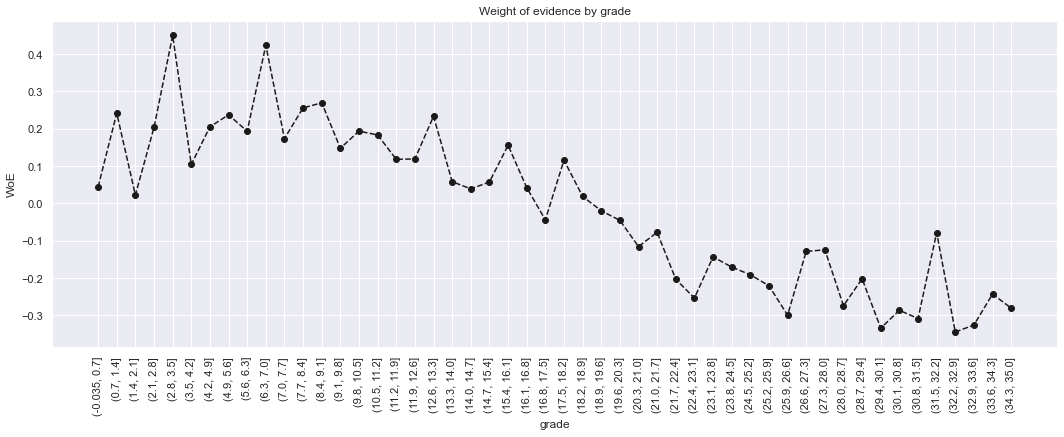

In [152]:
plot_by_woe(df_temp, 90)

In [153]:
df['dti:<=1.4'] = np.where((df['dti'] <= 1.4), 1, 0)
df['dti:1.4-3.5'] = np.where((df['dti'] > 1.4) & (df['dti'] <= 3.5), 1, 0)
df['dti:3.5-7.7'] = np.where((df['dti'] > 3.5) & (df['dti'] <= 7.7), 1, 0)
df['dti:7.7-10.5'] = np.where((df['dti'] > 7.7) & (df['dti'] <= 10.5), 1, 0)
df['dti:10.5-16.1'] = np.where((df['dti'] > 10.5) & (df['dti'] <= 16.1), 1, 0)
df['dti:16.1-20.3'] = np.where((df['dti'] > 16.1) & (df['dti'] <= 20.3), 1, 0)
df['dti:20.3-21.7'] = np.where((df['dti'] > 20.3) & (df['dti'] <= 21.7), 1, 0)
df['dti:21.7-22.4'] = np.where((df['dti'] > 21.7) & (df['dti'] <= 22.4), 1, 0)
df['dti:22.4-35'] = np.where((df['dti'] > 22.4) & (df['dti'] <= 35), 1, 0)
df['dti:>35'] = np.where((df['dti'] > 35), 1, 0)

In [154]:
df_temp = df[pd.notnull(df['mths_since_last_record'])]
df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_temp, 'mths_since_last_record_factor', target.loc[df_temp.index])
df_temp

/var/folders/97/r93hcn5n5359r3t8ndqxxn040000gp/T/ipykernel_50904/4234046463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['mths_since_last_record_factor'] = pd.cut(df_temp['mths_since_last_record'], 50)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,"(-0.129, 2.58]",0.881148,244,215.0,29.0,0.018679,0.027333,-0.380662,NaN,NaN,inf
1,"(2.58, 5.16]",0.944444,36,34.0,2.0,0.002954,0.001885,0.449209,0.063297,0.829871,inf
2,"(5.16, 7.74]",0.923077,39,36.0,3.0,0.003128,0.002828,0.100902,0.021368,0.348307,inf
3,"(7.74, 10.32]",0.924242,66,61.0,5.0,0.005300,0.004713,0.117432,0.001166,0.016529,inf
4,"(10.32, 12.9]",0.904762,42,38.0,4.0,0.003301,0.003770,-0.132713,0.019481,0.250144,inf
5,"(12.9, 15.48]",0.898551,69,62.0,7.0,0.005387,0.006598,-0.202780,0.006211,0.070068,inf
6,"(15.48, 18.06]",0.884211,95,84.0,11.0,0.007298,0.010368,-0.351083,0.014340,0.148303,inf
7,"(18.06, 20.64]",0.982759,58,57.0,1.0,0.004952,0.000943,1.659047,0.098548,2.010130,inf
8,"(20.64, 23.22]",0.900990,101,91.0,10.0,0.007906,0.009425,-0.175730,0.081769,1.834777,inf
9,"(23.22, 25.8]",0.968085,94,91.0,3.0,0.007906,0.002828,1.028243,0.067095,1.203973,inf


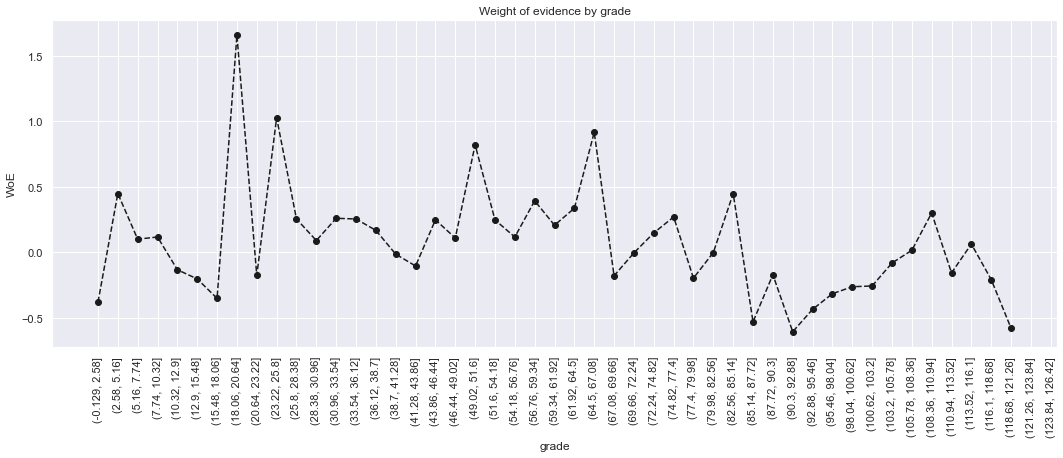

In [155]:
plot_by_woe(df_temp, 90)

In [156]:
df['mths_since_last_record:Missing'] = np.where((df['mths_since_last_record'].isnull()), 1, 0)
df['mths_since_last_record:0-2'] = np.where((df['mths_since_last_record'] >= 0) & (df['mths_since_last_record'] <= 2), 1, 0)
df['mths_since_last_record:3-20'] = np.where((df['mths_since_last_record'] >= 3) & (df['mths_since_last_record'] <= 20), 1, 0)
df['mths_since_last_record:21-31'] = np.where((df['mths_since_last_record'] >= 21) & (df['mths_since_last_record'] <= 31), 1, 0)
df['mths_since_last_record:32-80'] = np.where((df['mths_since_last_record'] >= 32) & (df['mths_since_last_record'] <= 80), 1, 0)
df['mths_since_last_record:81-86'] = np.where((df['mths_since_last_record'] >= 81) & (df['mths_since_last_record'] <= 86), 1, 0)
df['mths_since_last_record:>=86'] = np.where((df['mths_since_last_record'] >= 86), 1, 0)

In [157]:
df.drop(df.columns[df.columns.map(lambda x:'factor' in x)],axis=1)\
.to_csv('../processed/x_test_04_output.csv',index=False)